In [1]:
import pandas as pd
import math
import re

In [2]:
def checkText(line):
    """
    Type Of Traveller	Couple Leisure
    Cabin Flown	Economy
    Route	Stuttgart to Amsterdam
    Date Flown	September 2015
    Seat Comfort	12345
    Cabin Staff Service	12345
    Ground Service	12345
    Value For Money	12345
    Recommended	no
    """
    val = line.split('\t')
    key = val[0].rstrip()
    value = val[1].rstrip()
    print (val)
    return key, value


reviews = []

with open('4U_Reviews.txt', 'rb') as fp:
    review = {}
    for cnt, line in enumerate(fp):
        if line == b'\r\n':
            reviews.append(review)
            review = {}
        else:
            line = line.decode('cp1252')
            if "title" not in review.keys():
                review["title"] = line.rstrip()
            elif "namedate" not in review.keys():
                review["namedate"] = line.rstrip()
            elif "score" not in review.keys():
                review["score"] = line.rstrip()
            elif "text" not in review.keys():
                review["text"] = line.rstrip()
            else:
                key, value = checkText(line)
                review[key] = value

['Type Of Traveller', 'Couple Leisure\r\n']
['Cabin Flown', 'Economy\r\n']
['Route', 'Stuttgart to Amsterdam\r\n']
['Date Flown', 'September 2015\r\n']
['Seat Comfort', '12345\r\n']
['Cabin Staff Service', '12345\r\n']
['Ground Service', '12345\r\n']
['Value For Money', '12345\r\n']
['Recommended', 'no\r\n']
['Type Of Traveller', 'Solo Leisure\r\n']
['Cabin Flown', 'Economy\r\n']
['Route', 'Hamburg to London\r\n']
['Date Flown', 'September 2015\r\n']
['Seat Comfort', '12345\r\n']
['Cabin Staff Service', '12345\r\n']
['Ground Service', '12345\r\n']
['Value For Money', '12345\r\n']
['Recommended', 'no\r\n']
['Aircraft', 'A319-100\r\n']
['Type Of Traveller', 'Couple Leisure\r\n']
['Cabin Flown', 'Economy\r\n']
['Route', 'PMI to CGN\r\n']
['Date Flown', 'September 2015\r\n']
['Seat Comfort', '12345\r\n']
['Cabin Staff Service', '12345\r\n']
['Food & Beverages', '12345\r\n']
['Inflight Entertainment', '12345\r\n']
['Ground Service', '12345\r\n']
['Value For Money', '12345\r\n']
['Recommende

In [3]:
dframe = pd.DataFrame(reviews)
dframe.head()

,Aircraft,Cabin Flown,Cabin Staff Service,Date Flown,Food & Beverages,Ground Service,Inflight Entertainment,Recommended,Route,Seat Comfort,Type Of Traveller,Value For Money,Wifi & Connectivity,namedate,score,text,title
0,NaN,Economy,12345,September 2015,NaN,12345,NaN,no,Stuttgart to Amsterdam,12345,Couple Leisure,12345,NaN,Brian McNamee (Canada) 16th October 2015,2,We flew with Germanwings (or tried to) on Sept...,"""they have been unresponsive"""
1,NaN,Economy,12345,September 2015,NaN,12345,NaN,no,Hamburg to London,12345,Solo Leisure,12345,NaN,L Mouratidou (United Kingdom) 4th October 2015,3,I am less than impressed with Germanwings serv...,"""I was refused some water"""
2,A319-100,Economy,12345,September 2015,12345,12345,12345,no,PMI to CGN,12345,Couple Leisure,12345,NaN,H Mutschler (Germany) 21st September 2015,3,Flew from Palma de Mallorca to Cologne with Ge...,"""the service crew were friendly but nothing more"""
3,NaN,NaN,12345,August 2015,12345,12345,12345,yes,Berlin-Tegel to London Heathrow,12345,Business,12345,12345,Oliver Numrich (Germany) 20th September 2015,10,Good flight from Berlin-Tegel to London Heathr...,"""no problems or delays, very friendly staff"""
4,NaN,Economy,12345,September 2015,12345,12345,NaN,no,CGN to LHR,12345,Business,12345,NaN,Andreas Huettenhoelscher (Germany) 14th Septem...,4,I don't get why Germanwings is always late and...,"""I don't get why Germanwings is always late"""


In [4]:
pd.value_counts(dframe['Aircraft'], dropna=False, normalize=True).plot.bar()

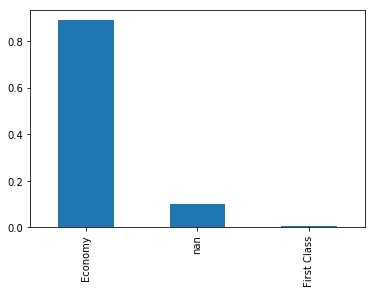

In [5]:
pd.value_counts(dframe['Cabin Flown'], dropna=False, normalize=True).plot.bar()

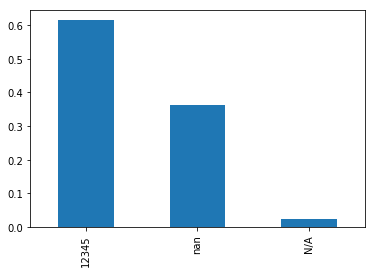

In [6]:
pd.value_counts(dframe['Cabin Staff Service'], dropna=False, normalize=True).plot.bar()

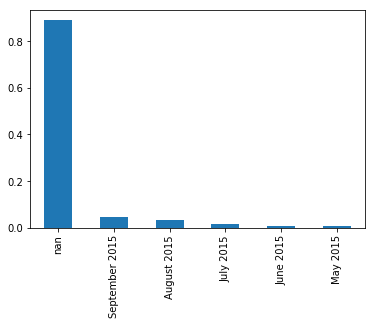

In [7]:
pd.value_counts(dframe['Date Flown'], dropna=False, normalize=True).plot.bar()

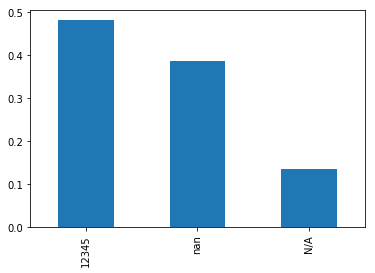

In [8]:
pd.value_counts(dframe['Food & Beverages'], dropna=False, normalize=True).plot.bar()

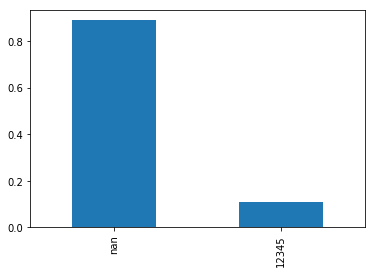

In [9]:
pd.value_counts(dframe['Ground Service'], dropna=False, normalize=True).plot.bar()

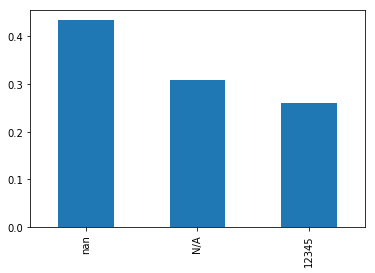

In [10]:
pd.value_counts(dframe['Inflight Entertainment'], dropna=False, normalize=True).plot.bar()

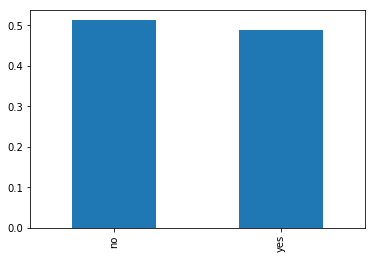

In [11]:
pd.value_counts(dframe['Recommended'], dropna=False, normalize=True).plot.bar()

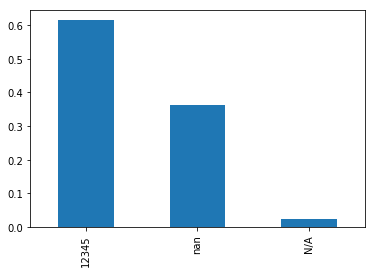

In [12]:
pd.value_counts(dframe['Seat Comfort'], dropna=False, normalize=True).plot.bar()

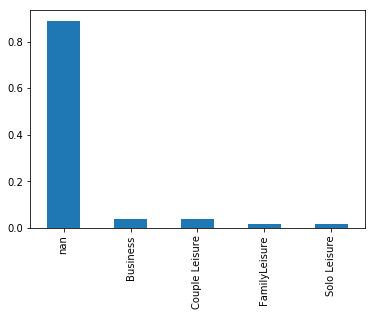

In [13]:
pd.value_counts(dframe['Type Of Traveller'], dropna=False, normalize=True).plot.bar()

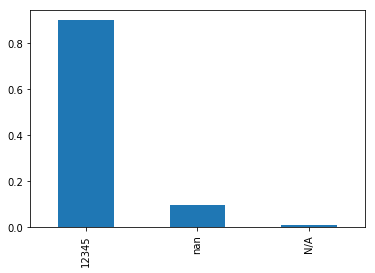

In [14]:
pd.value_counts(dframe['Value For Money'], dropna=False, normalize=True).plot.bar()

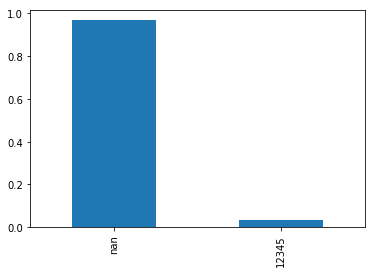

In [15]:
pd.value_counts(dframe['Wifi & Connectivity'], dropna=False, normalize=True).plot.bar()

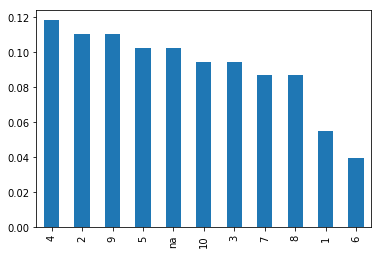

In [16]:
pd.value_counts(dframe['score'], dropna=False, normalize=True).plot.bar()

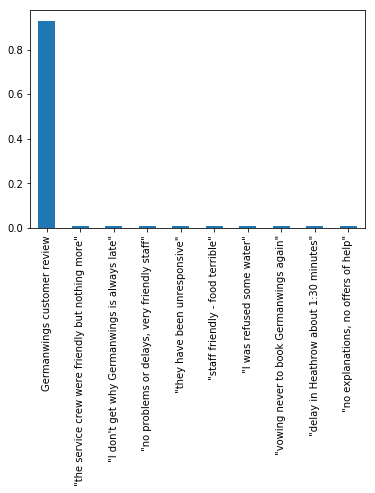

In [17]:
pd.value_counts(dframe['title'], dropna=False, normalize=True).plot.bar()

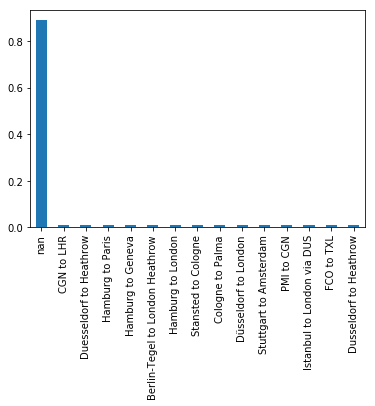

In [18]:
pd.value_counts(dframe['Route'], dropna=False, normalize=True).plot.bar()

In [19]:
trim = dframe.drop(columns=["Aircraft", "Type Of Traveller", "Cabin Staff Service", "Food & Beverages", "Ground Service", "Inflight Entertainment", "Seat Comfort", "Value For Money", "Wifi & Connectivity"])

In [20]:
trim.head()

,Cabin Flown,Date Flown,Recommended,Route,namedate,score,text,title
0,Economy,September 2015,no,Stuttgart to Amsterdam,Brian McNamee (Canada) 16th October 2015,2,We flew with Germanwings (or tried to) on Sept...,"""they have been unresponsive"""
1,Economy,September 2015,no,Hamburg to London,L Mouratidou (United Kingdom) 4th October 2015,3,I am less than impressed with Germanwings serv...,"""I was refused some water"""
2,Economy,September 2015,no,PMI to CGN,H Mutschler (Germany) 21st September 2015,3,Flew from Palma de Mallorca to Cologne with Ge...,"""the service crew were friendly but nothing more"""
3,NaN,August 2015,yes,Berlin-Tegel to London Heathrow,Oliver Numrich (Germany) 20th September 2015,10,Good flight from Berlin-Tegel to London Heathr...,"""no problems or delays, very friendly staff"""
4,Economy,September 2015,no,CGN to LHR,Andreas Huettenhoelscher (Germany) 14th Septem...,4,I don't get why Germanwings is always late and...,"""I don't get why Germanwings is always late"""


In [21]:
def getCity(route, needOrigin):
    if pd.isna(route):
        return "NaN"
    try:
        if needOrigin:
            return route.split()[0]
        else:
            return route.split()[2]
    except AttributeError:
        print (route)

trim['origin']=list(map(lambda x:getCity(x, True),trim.Route))
trim['destin']=list(map(lambda x:getCity(x, False),trim.Route))
trim = trim.drop(columns="Route")


In [22]:
def titleTextAppend(text, title):
    if "Germanwings customer review" not in title:
        return text + ". " + title[1:-1]
    else:
        return text
    
trim['text']=list(map(lambda x,y:titleTextAppend(x,y),trim.text, trim.title))
trim = trim.drop(columns="title")


In [23]:
def extractDate(nameDate):
    if pd.isna(nameDate):
        return "NaN"
    try:
        return nameDate.split()[-2] + " " + nameDate.split()[-1]
    except AttributeError:
        print (nameDate)

def extractCountry(nameDate):
    if "(" not in nameDate:
        return "NaN"
    return re.split(r'[()]',nameDate)[1]

trim['Date Flown']=list(map(lambda x:extractDate(x),trim.namedate))
trim['Country']=list(map(lambda x:extractCountry(x),trim.namedate))
trim = trim.drop(columns="namedate")


In [24]:
def getCities(text, needOrigin, current):
    if not current == "NaN":
        return current
    try:
        temp = re.findall('[A-Z][A-Z][A-Z]-[A-Z][A-Z][A-Z]',text)[0].split('-')
    except IndexError:
        try:
            temp = re.findall('[A-Z][A-Z][A-Z] to [A-Z][A-Z][A-Z]',text)[0].split('to')
        except IndexError:
            try:
                if text.split(" ")[1] == "to":
                    extract = re.findall("[\w ]+ to [\w]+", text)[0].split(" ")
                    temp = (extract[0], extract[-1])
                else:
                    extract = re.findall("from [\w ]+ to [\w]+", text)[0].split(" ")
                    temp = (extract[1], extract[-1])
            except IndexError:
                try:
                    temp = re.findall('[\w]+-[\w]+',text.split(".")[0])[0].split('-')
                except:    
                    temp = ("NaN","NaN")
    
    if needOrigin:
        return temp[0].strip()
    else:
        return temp[1].strip()

trim['origin']=list(map(lambda x,y:getCities(x, True, y),trim.text, trim.origin))
trim['destin']=list(map(lambda x,y:getCities(x, False, y),trim.text, trim.destin))


In [25]:
trim

,Cabin Flown,Date Flown,Recommended,score,text,origin,destin,Country
0,Economy,October 2015,no,2,We flew with Germanwings (or tried to) on Sept...,Stuttgart,Amsterdam,Canada
1,Economy,October 2015,no,3,I am less than impressed with Germanwings serv...,Hamburg,London,United Kingdom
2,Economy,September 2015,no,3,Flew from Palma de Mallorca to Cologne with Ge...,PMI,CGN,Germany
3,NaN,September 2015,yes,10,Good flight from Berlin-Tegel to London Heathr...,Berlin-Tegel,London,Germany
4,Economy,September 2015,no,4,I don't get why Germanwings is always late and...,CGN,LHR,Germany
5,Economy,September 2015,no,1,We were delayed 5 hours in Istanbul and receiv...,Istanbul,London,United Kingdom
6,Economy,September 2015,yes,7,Easy Check-In at Düsseldorf. The Germanwings f...,Düsseldorf,London,Germany
7,Economy,September 2015,no,2,Checked in at Dusseldorf for our Germanwings f...,Dusseldorf,Heathrow,United Kingdom
8,Economy,August 2015,no,2,This Germanwings flight should take off as sch...,Duesseldorf,Heathrow,Gibraltar
9,Economy,August 2015,no,5,Germanwings is a very mediocre airline. Compar...,Cologne,Palma,Australia


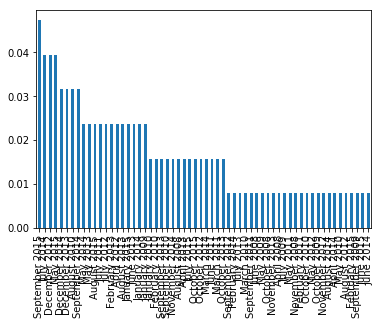

In [26]:
pd.value_counts(trim['Date Flown'], sort=True, normalize=True).plot.bar()

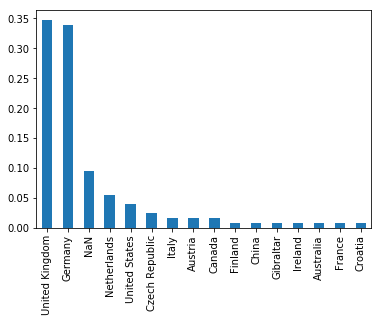

In [27]:
pd.value_counts(trim['Country'], dropna=False, normalize=True).plot.bar()

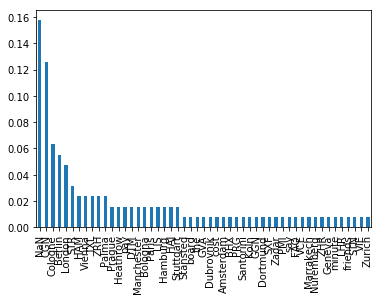

In [28]:
pd.value_counts(trim['destin'], dropna=False, normalize=True).plot.bar()

In [29]:
trim.to_pickle('cleanData.pkl')